<h1>
Convolutional Neural Network With Tensorflow
</h1>

<h2>
By Axel Ind (<i>4563539</i>)
</h2>

<h4>
14.11.2017
</h4>

<h3>
Exercise 2 of Deep Learning Lab (University of Freiburg)
</h3>

<p>
<b>Note:</b> This project is extensively modelled on the excellent convolutional neural network presented <a href="https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py">here</a>.
</p>

Import Tensorflow. (Tensorflow-GPU functionality is automatically handled.)

In [3]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf

Import and store the MNIST data set.

In [4]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Define Training Parameters

Define Hyper-prameters.

In [5]:
#Each pixel of the image is an input
num_input = 28*28

#10 output classes because the numbers being classified are (0-9)
num_classes = 10

# Dropout, probability to keep units
dropout = 0.75 

Define the Neural Network

In [6]:
# Create the neural network
def conv_net(x_dict, n_classes, dropout, reuse, is_training, kernelSize=3,  numFullyConnectedNodes = 128):
    # Define a scope for reusing the variables
    print("NUM FILTERS IS ",numFilters)
    with tf.variable_scope('ConvNet', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['images']

        # MNIST data input is a 1-D vector of 784 features (28*28 pixels)
        # Reshape to match picture format [Height x Width x Channel]
        # Tensor input become 4-D: [Batch Size, Height, Width, Channel]
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

        conv1 = tf.layers.conv2d(x, numFilters, kernelSize, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        conv2 = tf.layers.conv2d(conv1, numFilters, kernelSize, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, numFullyConnectedNodes)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out



Define the model function.

In [ ]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    # Because Dropout have different behavior at training and prediction time, we
    # need to create 2 distinct computation graphs that still share the same weights.
    logits_train = conv_net(features, num_classes, dropout, reuse=False,
                            is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True,
                           is_training=False)

    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

        # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op,
                                  global_step=tf.train.get_global_step())

    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs


Build the estimator.

In [ ]:

# Training Parameters
learning_rates=(0.01)
learning_rate = 0.001
num_steps = None
batch_size = 256
numEpochs = 2
numFilters=16

def runOnce(learning_rate,num_steps,batch_size,numEpochs, numFilters):
    model = tf.estimator.Estimator(model_fn)
    
    # Define the input function for training
    for i in range (1,numEpochs+1):  
        input_fn = tf.estimator.inputs.numpy_input_fn(
            x={'images': mnist.train.images}, y=mnist.train.labels,
            batch_size=batch_size, num_epochs=1, shuffle=True)
        # Train the Model
        model.train(input_fn, steps=num_steps)

        # Evaluate the Model
        # Define the input function for evaluating
        input_fn = tf.estimator.inputs.numpy_input_fn(
            x={'images': mnist.test.images}, y=mnist.test.labels,
            batch_size=batch_size, shuffle=False)
        # Use the Estimator 'evaluate' method
        e = model.evaluate(input_fn)

        print("Testing Accuracy:", e['accuracy'])


runOnce(learning_rate=learning_rate,num_steps=num_steps,batch_size=batch_size,numEpochs=numEpochs, numFilters=numFilters)
print("DONE")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmpzbengvd_', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}
NUM FILTERS IS  16
NUM FILTERS IS  16
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\User\AppData\Local\Temp\tmpzbengvd_\model.ckpt.
INFO:tensorflow:loss = 2.45066, step = 1
INFO:tensorflow:global_step/sec: 12.5816
INFO:tensorflow:loss = 0.403542, step = 101 (7.949 sec)


<h2>
Data Distribution
</h2>

(array([ 5444.,  6179.,  5470.,  5638.,  5307.,  4987.,  5417.,  5715.,
         5389.,  5454.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

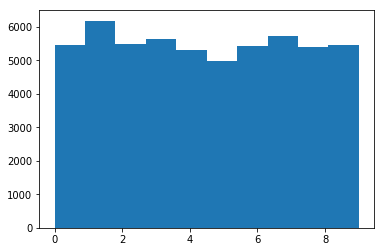

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.hist(mnist.train.labels)

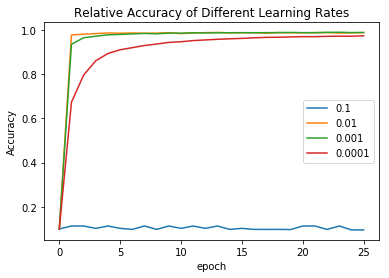

In [19]:
import numpy as np

t_ = np.array(trainingData)
x = np.arange(0,numEpochs+1)
y_ = np.split(t_[:,2],len(learning_rates))

plt.clf()
plt.title("Relative Accuracy of Different Learning Rates")
plt.xlabel('epoch')
plt.ylabel('Accuracy')
for i in range (0, len(learning_rates)):
    plt.plot(x,y_[i],label=str(learning_rates[i]))
    plt.legend()


    

In [14]:
import time

# Training Parameters
FILTERS=[8,16,32,64,128,256]
numFilters=16

trainingData=[]
times=[]
for i in range (0,len(FILTERS)):
    time1=time.time()
    numFilters=FILTERS[i]
    trainingData=runOnce(learning_rate=learning_rates[0],num_steps=num_steps,batch_size=batch_size,numEpochs=numEpochs, numFilters=numFilters,trainingData=trainingData)
    time2=time.time()
    times.append(time2-time1)
print("DONE")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmp9inlyibd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002678B511CC0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
NUM FILTERS IS  8
NUM FILTERS IS  8
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\User\AppData\Local\Temp\tmp9inlyibd\model.ckpt.
INFO:tensorflow:loss = 2.32114, step = 1
INFO:tensorflow:global_step/sec: 66.0054
INFO:tensorflow:loss = 2.1227, step = 101 (1.516 sec)
INFO:tensorflow:Saving checkpoints for 108 into C:\Users\User\Ap

NUM FILTERS IS  256
NUM FILTERS IS  256
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\User\AppData\Local\Temp\tmplr2sjj42\model.ckpt.
INFO:tensorflow:loss = 2.31204, step = 1
INFO:tensorflow:global_step/sec: 4.67225
INFO:tensorflow:loss = 0.460049, step = 101 (21.405 sec)
INFO:tensorflow:Saving checkpoints for 108 into C:\Users\User\AppData\Local\Temp\tmplr2sjj42\model.ckpt.
INFO:tensorflow:Loss for final step: 0.378375.
NUM FILTERS IS  256
NUM FILTERS IS  256
INFO:tensorflow:Starting evaluation at 2017-11-15-11:44:27
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmplr2sjj42\model.ckpt-108
INFO:tensorflow:Finished evaluation at 2017-11-15-11:44:29
INFO:tensorflow:Saving dict for global step 108: accuracy = 0.9286, global_step = 108, loss = 0.397335
Testing Accuracy: 0.9286
DONE


[7.192342281341553, 7.386621713638306, 7.899008512496948, 10.692513227462769, 16.18901300430298, 29.4032621383667]
[8, 16, 32, 64, 128, 256]


Text(0,0.5,'Computation Time (s)')

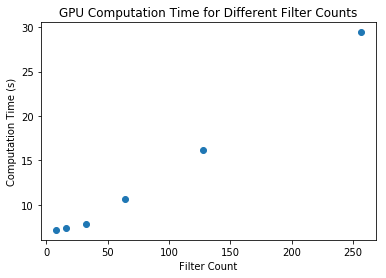

In [15]:

print(times)
print(FILTERS)
plt.scatter(FILTERS, times)
plt.title("GPU Computation Time for Different Filter Counts")
plt.xlabel('Filter Count')
plt.ylabel('Computation Time (s)')

In [11]:
with tf.Session() as sess:
     with tf.device("/cpu:0"):
        %env CUDA_DEVICE_ORDER=PCI_BUS_ID
        %env CUDA_VISIBLE_DEVICES=-1
        FILTERS=[8,16,32,64]
        numFilters=16

        trainingData=[]
        timesCPU=[]
        for i in range (0,len(FILTERS)):
            time1=time.time()
            numFilters=FILTERS[i]
            trainingData=runOnce(learning_rate=learning_rates[0],num_steps=num_steps,batch_size=batch_size,numEpochs=numEpochs, numFilters=numFilters,trainingData=trainingData)
            time2=time.time()
            timesCPU.append(time2-time1)
        print("DONE")

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=-1
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmp1fp4tu03', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002663D628908>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
NUM FILTERS IS  8
NUM FILTERS IS  8
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\User\AppData\Local\Temp\tmp1fp4tu03\model.ckpt.
INFO:tensorflow:loss = 2.44898, step = 1
INFO:tensorflow:global_step/sec: 67.1139
INFO:tensorflow:loss = 2.07793, step = 101 (1.491 sec)


[7.022744655609131, 7.029633522033691, 8.47053050994873, 10.562109470367432]
[8, 16, 32, 64]


Text(0,0.5,'Computation Time (s)')

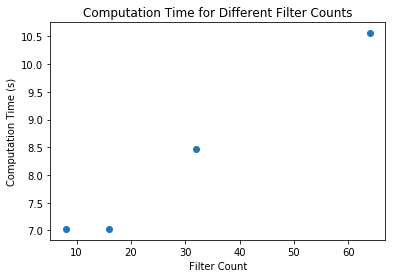

In [12]:
print(timesCPU)
print(FILTERS)
plt.scatter(FILTERS, timesCPU)
plt.title("Computation Time for Different Filter Counts")
plt.xlabel('Filter Count')
plt.ylabel('Computation Time (s)')